<a href="https://colab.research.google.com/github/Supriya840/Chess-Playing-Robotic-arm-development/blob/main/board_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clustered_e1616dc9962fed075576ac4ea3553f51_jpg.png to clustered_e1616dc9962fed075576ac4ea3553f51_jpg.png


In [ ]:
img = cv2.imread('clustered_e1616dc9962fed075576ac4ea3553f51_jpg.png')
# img = cv2.imread(r'C:\Users\kyle\Pictures\Camera Roll\WIN_20210228_12_57_17_Pro.jpg')
rows,cols,ch = img.shape
print(img.shape)

(1371, 2048, 3)


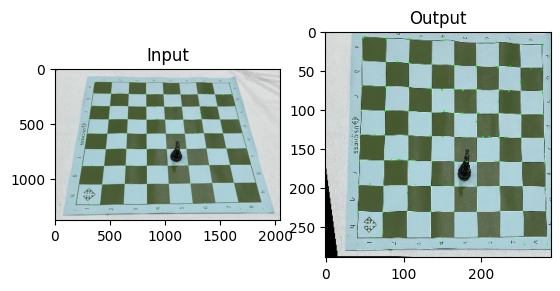

In [ ]:
pts1 = np.float32([[327,265],[1173,249],[227,1150],[1273,1140]])
pts2 = np.float32([[45,50],[200,50],[45,250],[200,250]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(290,290))

plt.pyplot.subplot(121),plt.pyplot.imshow(img),plt.pyplot.title('Input')
plt.pyplot.subplot(122),plt.pyplot.imshow(dst),plt.pyplot.title('Output')
plt.pyplot.show()

In [ ]:
lower = [15, 20, 70]
upper = [25, 40, 80]

lower = [int(lower[0]*255/360),int(lower[1]*255/100),int(lower[2]*255/100)]
upper = [int(upper[0]*255/360),int(upper[1]*255/100),int(upper[2]*255/100)]

hsvim = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

skinRegionHSV = cv2.inRange(hsvim, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)

newImg = dst
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(newImg, [contours], -1, (255,255,0), 2)

plt.pyplot.subplot(121),plt.pyplot.imshow(thresh,'gray'),plt.pyplot.title('Threshold')
plt.pyplot.subplot(122),plt.pyplot.imshow(newImg),plt.pyplot.title('Contours')
plt.pyplot.show()

In [ ]:
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

In [ ]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [ ]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

In [ ]:
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 1)

In [ ]:
cv2.imshow("Warped", dst)
cv2.imshow("Edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()